# **Afnan Madi**

#**Product: Amazon Alexa**


## **Assignment Natural Language processsing - Sentiment Analysis**

### **Customer Review Classification using Random Forest**

- Dataset consists of 3000 Amazon customer reviews, star ratings, date of review, variant and feedback of various amazon Alexa products like Alexa Echo, Echo dots.
- **The objective is to discover insights into consumer reviews and perfrom sentiment analysis on the data.** Positive or Negative review?
- Dataset: www.kaggle.com/sid321axn/amazon-alexa-reviews also provided(`amazon_alexa.tsv`)
---




### **Follow the instructions and complete each TODO to complete the assessment on the essential steps in building and evaluating a classification model.**



**Dataset Information:**

The dataset consists of customer reviews for Amazon Alexa products, including various features related to the product variation, customer rating, and feedback sentiment.

_Features/Columns_:
* rating: The customer rating of the product (scale of 1 to 5).
* date: The date when the review was posted.
* variation: The variation or type of Alexa product the review is for (e.g., "Charcoal Fabric", "Walnut Finish").
* verified_reviews: The actual review text written by the customer.
* feedback: The target variable indicating the sentiment of the review (1 for positive sentiment and 0 for negative sentiment).



---




# Amazon Alexa Customer Review Sentiment Analysis
# Objective: Classify reviews as positive or negative using Random Forest


In [1]:
# TODO: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# TODO: Load the dataset
df = pd.read_csv("amazon_alexa.tsv", sep='\t')


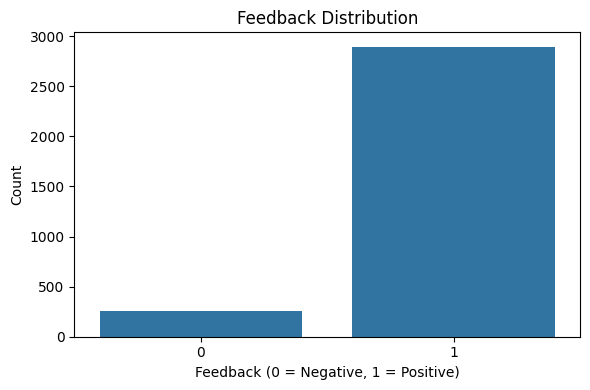

In [3]:
# Data Visualization and Clean Up
# TODO: Visualize the distribution of feedback
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='feedback')
plt.title("Feedback Distribution")
plt.xlabel("Feedback (0 = Negative, 1 = Positive)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

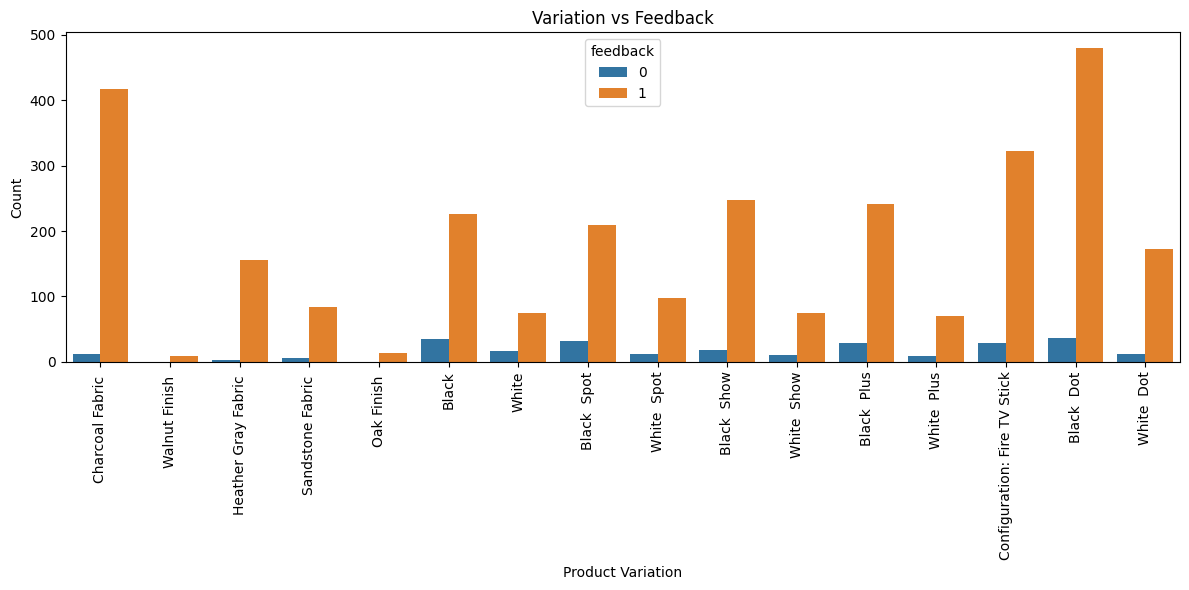

In [4]:
# TODO: Visualize the relationship between variations and ratings
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='variation', hue='feedback')
plt.title("Variation vs Feedback")
plt.xlabel("Product Variation")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [5]:
# TODO: Drop irrelevant columns
df_cleaned = df.drop(columns=['date', 'rating'])

In [6]:
# One-Hot Encoding
# TODO: Perform one-hot encoding on the 'variation' column
df_encoded = pd.get_dummies(df_cleaned, columns=['variation'])

In [9]:
# Clean missing reviews
df_encoded['verified_reviews'] = df_encoded['verified_reviews'].fillna('')  # Replace NaNs with empty string

In [10]:
# Tokenize 'verified_reviews' using CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X_text = vectorizer.fit_transform(df_encoded['verified_reviews'])

In [11]:
# Convert to DataFrame and reset index
tokenized_df = pd.DataFrame(X_text.toarray(), columns=vectorizer.get_feature_names_out())
tokenized_df.reset_index(drop=True, inplace=True)

In [12]:
# Encode product variation and reset index
encoded_features = df_encoded.drop(columns=['verified_reviews', 'feedback']).reset_index(drop=True)

In [13]:
# Combine tokenized text and variation features
X = pd.concat([tokenized_df, encoded_features], axis=1)
y = df_encoded['feedback']

In [14]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
# Predict and evaluate
y_pred = rf_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

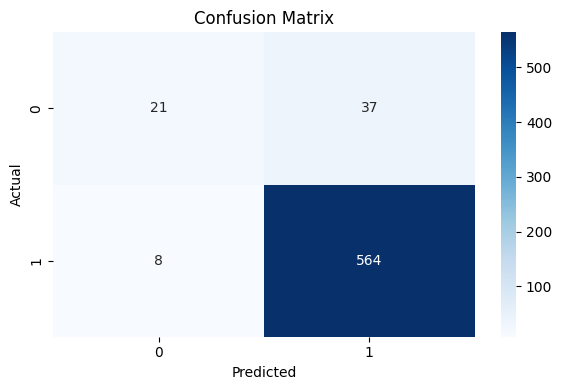

In [17]:
# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [18]:
# Print classification report
print("Classification Report:\n")
print(report)

Classification Report:

              precision    recall  f1-score   support

           0       0.72      0.36      0.48        58
           1       0.94      0.99      0.96       572

    accuracy                           0.93       630
   macro avg       0.83      0.67      0.72       630
weighted avg       0.92      0.93      0.92       630



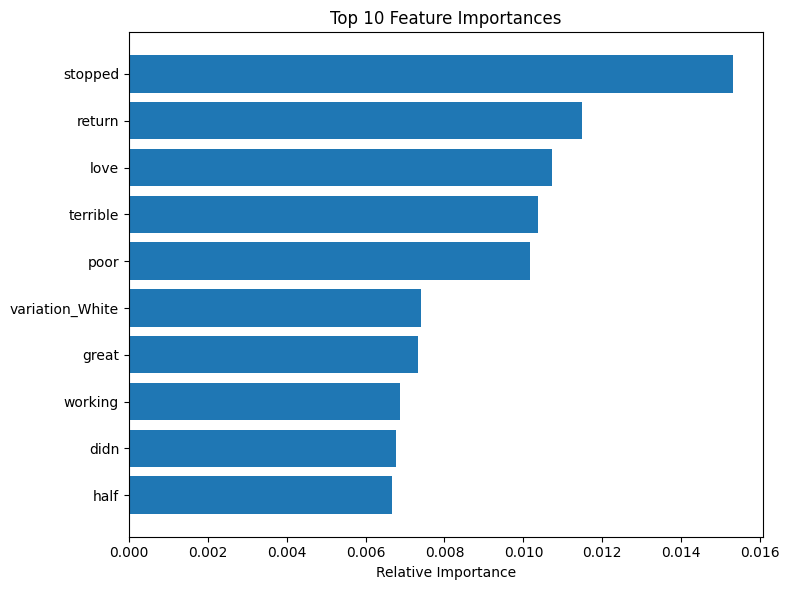

In [19]:
# Plot top 10 feature importances
importances = rf_model.feature_importances_
indices = np.argsort(importances)[-10:]
features = X.columns[indices]

plt.figure(figsize=(8, 6))
plt.title("Top 10 Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), features)
plt.xlabel("Relative Importance")
plt.tight_layout()
plt.show()

In [20]:
# Define prediction function for new reviews
def predict_sentiment(review_text):
    review_vector = vectorizer.transform([review_text])
    review_df = pd.DataFrame(review_vector.toarray(), columns=vectorizer.get_feature_names_out())
 # Add missing columns as zeros
    for col in X.columns:
        if col not in review_df.columns:
            review_df[col] = 0

    # Align column order
    review_df = review_df[X.columns]
    prediction = rf_model.predict(review_df)[0]
    return "Positive" if prediction == 1 else "Negative"


In [21]:
# Example usage
new_review = "I love my Alexa device! It's so helpful."
predicted_sentiment = predict_sentiment(new_review)
print(f"The sentiment of the new review is: {predicted_sentiment}")

The sentiment of the new review is: Positive
